<a href="https://colab.research.google.com/github/mjmousavi97/Deep-Learning-Tehran-uni/blob/main/HomeWorks/01%20HW/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Gradient Descent in MLP – Derivation and Update Rules

---

## Notation

- $N$: Total number of training samples (full batch)
- $x^{(n)}$: Input vector for sample $n$
- $y^{(n)}$: True output (target) for sample $n$
- $h^{(n)}$: Network output for sample $n$
- $f(\cdot)$: Activation function at hidden layer
- $g(\cdot)$: Activation function at output layer
- Loss function:

  $$
  J = \frac{1}{N} \sum_{n=1}^N \frac{1}{2} \| h^{(n)} - y^{(n)} \|^2
  $$

---

## Forward Propagation (Per Sample)

1. **Hidden layer**:
   $$
   z_j^{1(n)} = \sum_i w^1_{ji} x_i^{(n)} + b^1_j
   $$
   $$
   a_j^{1(n)} = f(z_j^{1(n)})
   $$

2. **Output layer**:
   $$
   z_k^{2(n)} = \sum_j w^2_{kj} a_j^{1(n)} + b^2_k
   $$
   $$
   h_k^{(n)} = g(z_k^{2(n)})
   $$

---

## Gradients (Full-Batch)

### Output Weights $w^2_{kj}$

$$
\frac{\partial J}{\partial w^2_{kj}} =
\frac{1}{N} \sum_{n=1}^N (h_k^{(n)} - y_k^{(n)}) \cdot g'(z_k^{2(n)}) \cdot a_j^{1(n)}
$$

---

### Output Biases $b^2_k$

$$
\frac{\partial J}{\partial b^2_k} =
\frac{1}{N} \sum_{n=1}^N (h_k^{(n)} - y_k^{(n)}) \cdot g'(z_k^{2(n)})
$$

---

### Hidden Weights $w^1_{ji}$

$$
\frac{\partial J}{\partial w^1_{ji}} =
\frac{1}{N} \sum_{n=1}^N \sum_k
\left[ (h_k^{(n)} - y_k^{(n)}) \cdot g'(z_k^{2(n)}) \cdot w^2_{kj} \right]
\cdot f'(z_j^{1(n)}) \cdot x_i^{(n)}
$$

---

### Hidden Biases $b^1_j$

$$
\frac{\partial J}{\partial b^1_j} =
\frac{1}{N} \sum_{n=1}^N \sum_k
\left[ (h_k^{(n)} - y_k^{(n)}) \cdot g'(z_k^{2(n)}) \cdot w^2_{kj} \right]
\cdot f'(z_j^{1(n)})
$$

---

## Update Rules

Using learning rate $\eta$:

- **Output weights**:
  $$
  w^2_{kj} \leftarrow w^2_{kj} - \eta \cdot \frac{\partial J}{\partial w^2_{kj}}
  $$

- **Output biases**:
  $$
  b^2_k \leftarrow b^2_k - \eta \cdot \frac{\partial J}{\partial b^2_k}
  $$

- **Hidden weights**:
  $$
  w^1_{ji} \leftarrow w^1_{ji} - \eta \cdot \frac{\partial J}{\partial w^1_{ji}}
  $$

- **Hidden biases**:
  $$
  b^1_j \leftarrow b^1_j - \eta \cdot \frac{\partial J}{\partial b^1_j}
  $$


# Backpropagation Derivations for Stochastic and Mini-Batch Gradient Descent

This document provides detailed mathematical derivations for training a Multi-Layer Perceptron (MLP) with one hidden layer using:

- **Stochastic Gradient Descent (SGD)**
- **Mini-Batch Gradient Descent**

---

## ✅ Network Architecture

Let the MLP be defined as follows:

- Input: $ \mathbf{x} \in \mathbb{R}^n $
- Hidden layer: weights $ W^1 $, biases $ b^1 $, activation $ f $
- Output layer: weights $ W^2 $, biases $ b^2 $, activation $ g $

### Forward Propagation:

- Hidden pre-activation:  
  $$
  z_j^2 = \sum_{i} w_{ji}^1 x_i + b_j^1
  $$

- Hidden activation:  
  $$
  a_j^2 = f(z_j^2)
  $$

- Output pre-activation:  
  $$
  z_k^3 = \sum_{j} w_{kj}^2 a_j^2 + b_k^2
  $$

- Output activation:  
  $$
  h_k = g(z_k^3)
  $$

---

## ✅ 1. Stochastic Gradient Descent (SGD)

### 🔹 Loss Function:

For a single training example $ (\mathbf{x}^q, y^q) $:

$$
J^{(q)}(\mathbf{w}, \mathbf{b}) = \frac{1}{2} (h_k^q - y_k^q)^2
$$

### 🔹 Gradients:

#### Output Layer

- $ \frac{\partial J}{\partial z_k^3} = (h_k - y_k) \cdot g'(z_k^3) $

- $ \frac{\partial J}{\partial w_{kj}^2} = (h_k - y_k) g'(z_k^3) a_j^2 $

- $ \frac{\partial J}{\partial b_k^2} = (h_k - y_k) g'(z_k^3) $

#### Hidden Layer

- Backpropagate error:  
  $$
  \delta_j^2 = f'(z_j^2) \sum_k (h_k - y_k) g'(z_k^3) w_{kj}^2
  $$

- $ \frac{\partial J}{\partial w_{ji}^1} = \delta_j^2 x_i $

- $ \frac{\partial J}{\partial b_j^1} = \delta_j^2 $

### 🔹 Update Rules:

- $ w_{kj}^{2(new)} = w_{kj}^{2(old)} - \alpha (h_k - y_k) g'(z_k^3) a_j^2 $

- $ b_k^{2(new)} = b_k^{2(old)} - \alpha (h_k - y_k) g'(z_k^3) $

- $ w_{ji}^{1(new)} = w_{ji}^{1(old)} - \alpha \delta_j^2 x_i $

- $ b_j^{1(new)} = b_j^{1(old)} - \alpha \delta_j^2 $

---

## ✅ 2. Mini-Batch Gradient Descent

### 🔹 Loss Function:

For a mini-batch of size $ B $:

$$
J^{(\text{batch})}(\mathbf{w}, \mathbf{b}) = \frac{1}{2B} \sum_{q=1}^{B} (h_k^q - y_k^q)^2
$$

### 🔹 Gradients:

**Average over the batch**:

- $ \frac{\partial J}{\partial w_{kj}^2} = \frac{1}{B} \sum_{q=1}^B (h_k^q - y_k^q) g'(z_k^{3,q}) a_j^{2,q} $

- $ \frac{\partial J}{\partial b_k^2} = \frac{1}{B} \sum_{q=1}^B (h_k^q - y_k^q) g'(z_k^{3,q}) $

- Hidden error term for each $ j $:  
  $$
  \delta_j^{2,q} = f'(z_j^{2,q}) \sum_k (h_k^q - y_k^q) g'(z_k^{3,q}) w_{kj}^2
  $$

- $ \frac{\partial J}{\partial w_{ji}^1} = \frac{1}{B} \sum_{q=1}^B \delta_j^{2,q} x_i^q $

- $ \frac{\partial J}{\partial b_j^1} = \frac{1}{B} \sum_{q=1}^B \delta_j^{2,q} $

### 🔹 Update Rules:

- $ w_{kj}^{2(new)} = w_{kj}^{2(old)} - \alpha \cdot \frac{1}{B} \sum_{q=1}^B (h_k^q - y_k^q) g'(z_k^{3,q}) a_j^{2,q} $

- $ w_{ji}^{1(new)} = w_{ji}^{1(old)} - \alpha \cdot \frac{1}{B} \sum_{q=1}^B \delta_j^{2,q} x_i^q $




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [4]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Categorical Data and Encoding Methods

## What is Categorical Data?

Categorical data represents characteristics or labels that describe data points.
These are typically non-numeric and fall into two types:

1. Nominal Data (Non-ordinal):
   - Categories have no inherent order.
   - Examples: color (red, blue, green), city (Paris, London, Tokyo)

2. Ordinal Data:
   - Categories have a meaningful order.
   - Examples: low < medium < high, bad < average < good < excellent

---

## Why Do We Need to Encode Categorical Data?

Most machine learning algorithms and neural networks require numerical input.
Therefore, we need to convert categorical values into numeric representations.

---

## Common Encoding Methods

### 1. Label Encoding (Best for Ordinal Data)
Assigns an integer value to each category, preserving order.

```python
from sklearn.preprocessing import LabelEncoder
data = ['low', 'medium', 'high']
le = LabelEncoder()
encoded = le.fit_transform(data)
print(encoded)  # Example output: [1, 2, 0]
```

⚠️ Not suitable for nominal data — models may assume numeric relationship where none exists.

---

### 2. One-Hot Encoding (Best for Nominal Data)
Creates a new binary column for each category.

```python
import pandas as pd
df = pd.DataFrame({'color': ['red', 'blue', 'green']})
df_encoded = pd.get_dummies(df, columns=['color'])
print(df_encoded)
```

✅ Prevents false ordering
❌ May increase dimensionality

---

## Summary

| Data Type | Recommended Encoding | Notes                      |
|-----------|----------------------|----------------------------|
| Nominal   | One-Hot Encoding     | No inherent order          |
| Ordinal   | Label Encoding       | Order matters              |



In [8]:
np.sum(df.isnull(), axis=0)

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [9]:
carname = df['CarName']
carname.value_counts()


,count
CarName,
peugeot 504,6
toyota corolla,6
toyota corona,6
subaru dl,4
mitsubishi outlander,3
...,...
volkswagen super beetle,1
volkswagen rabbit custom,1
volvo 245,1


In [10]:
company_name = []

for carname in df['CarName']:
    com_name = carname.split()[0]
    company_name.append(com_name)

companyname = pd.DataFrame(company_name)

df.insert(2, 'CompanyName', companyname[0])

In [11]:
df.head(5)

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df.tail(5)

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,volvo 244dl,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,volvo 246,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo,volvo 264gl,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [13]:
set(df['CompanyName'])

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

In [14]:
# Drop the specified columns from the DataFrame
df = df.drop(['car_ID', 'symboling', 'CarName'], axis=1)

In [15]:
# Convert all company names to lowercase for consistency
df['CompanyName'] = df['CompanyName'].str.lower()

# Replace misspelled company names
df['CompanyName'].replace('maxda','mazda',inplace=True)    # Replace "maxda" with "mazda"
df['CompanyName'].replace('porcshce','porsche',inplace=True)   # Replace "porcshce" with "porsche"
df['CompanyName'].replace('vw','volkswagen',inplace=True)      # Replace "vw" with "volkswagen"
df['CompanyName'].replace('vokswagen','volkswagen',inplace=True)     # Replace "vokswagen" with "volkswagen"
df['CompanyName'].replace('toyouta','toyota',inplace=True)          # Replace "toyouta" with "toyota"


/tmp/ipython-input-3656561459.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompanyName'].replace('maxda','mazda',inplace=True)    # Replace "maxda" with "mazda"
/tmp/ipython-input-3656561459.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [16]:
df

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


##  Convert descriptive data to numerical data

In [18]:
df.columns

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [19]:
# List of specified categorical columns
dummy = ['doornumber', 'cylindernumber', 'CompanyName', 'fuelsystem', 'fueltype',
         'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype']

In [20]:
# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(df, columns=dummy, drop_first=True)

In [21]:
df2.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,True,False,False,False,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,True,False,False,False,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,True,False,False,False,False,False,True,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,False,True,False,False,False,False,True,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,False,False,False,False,False,False,True,False,False,False


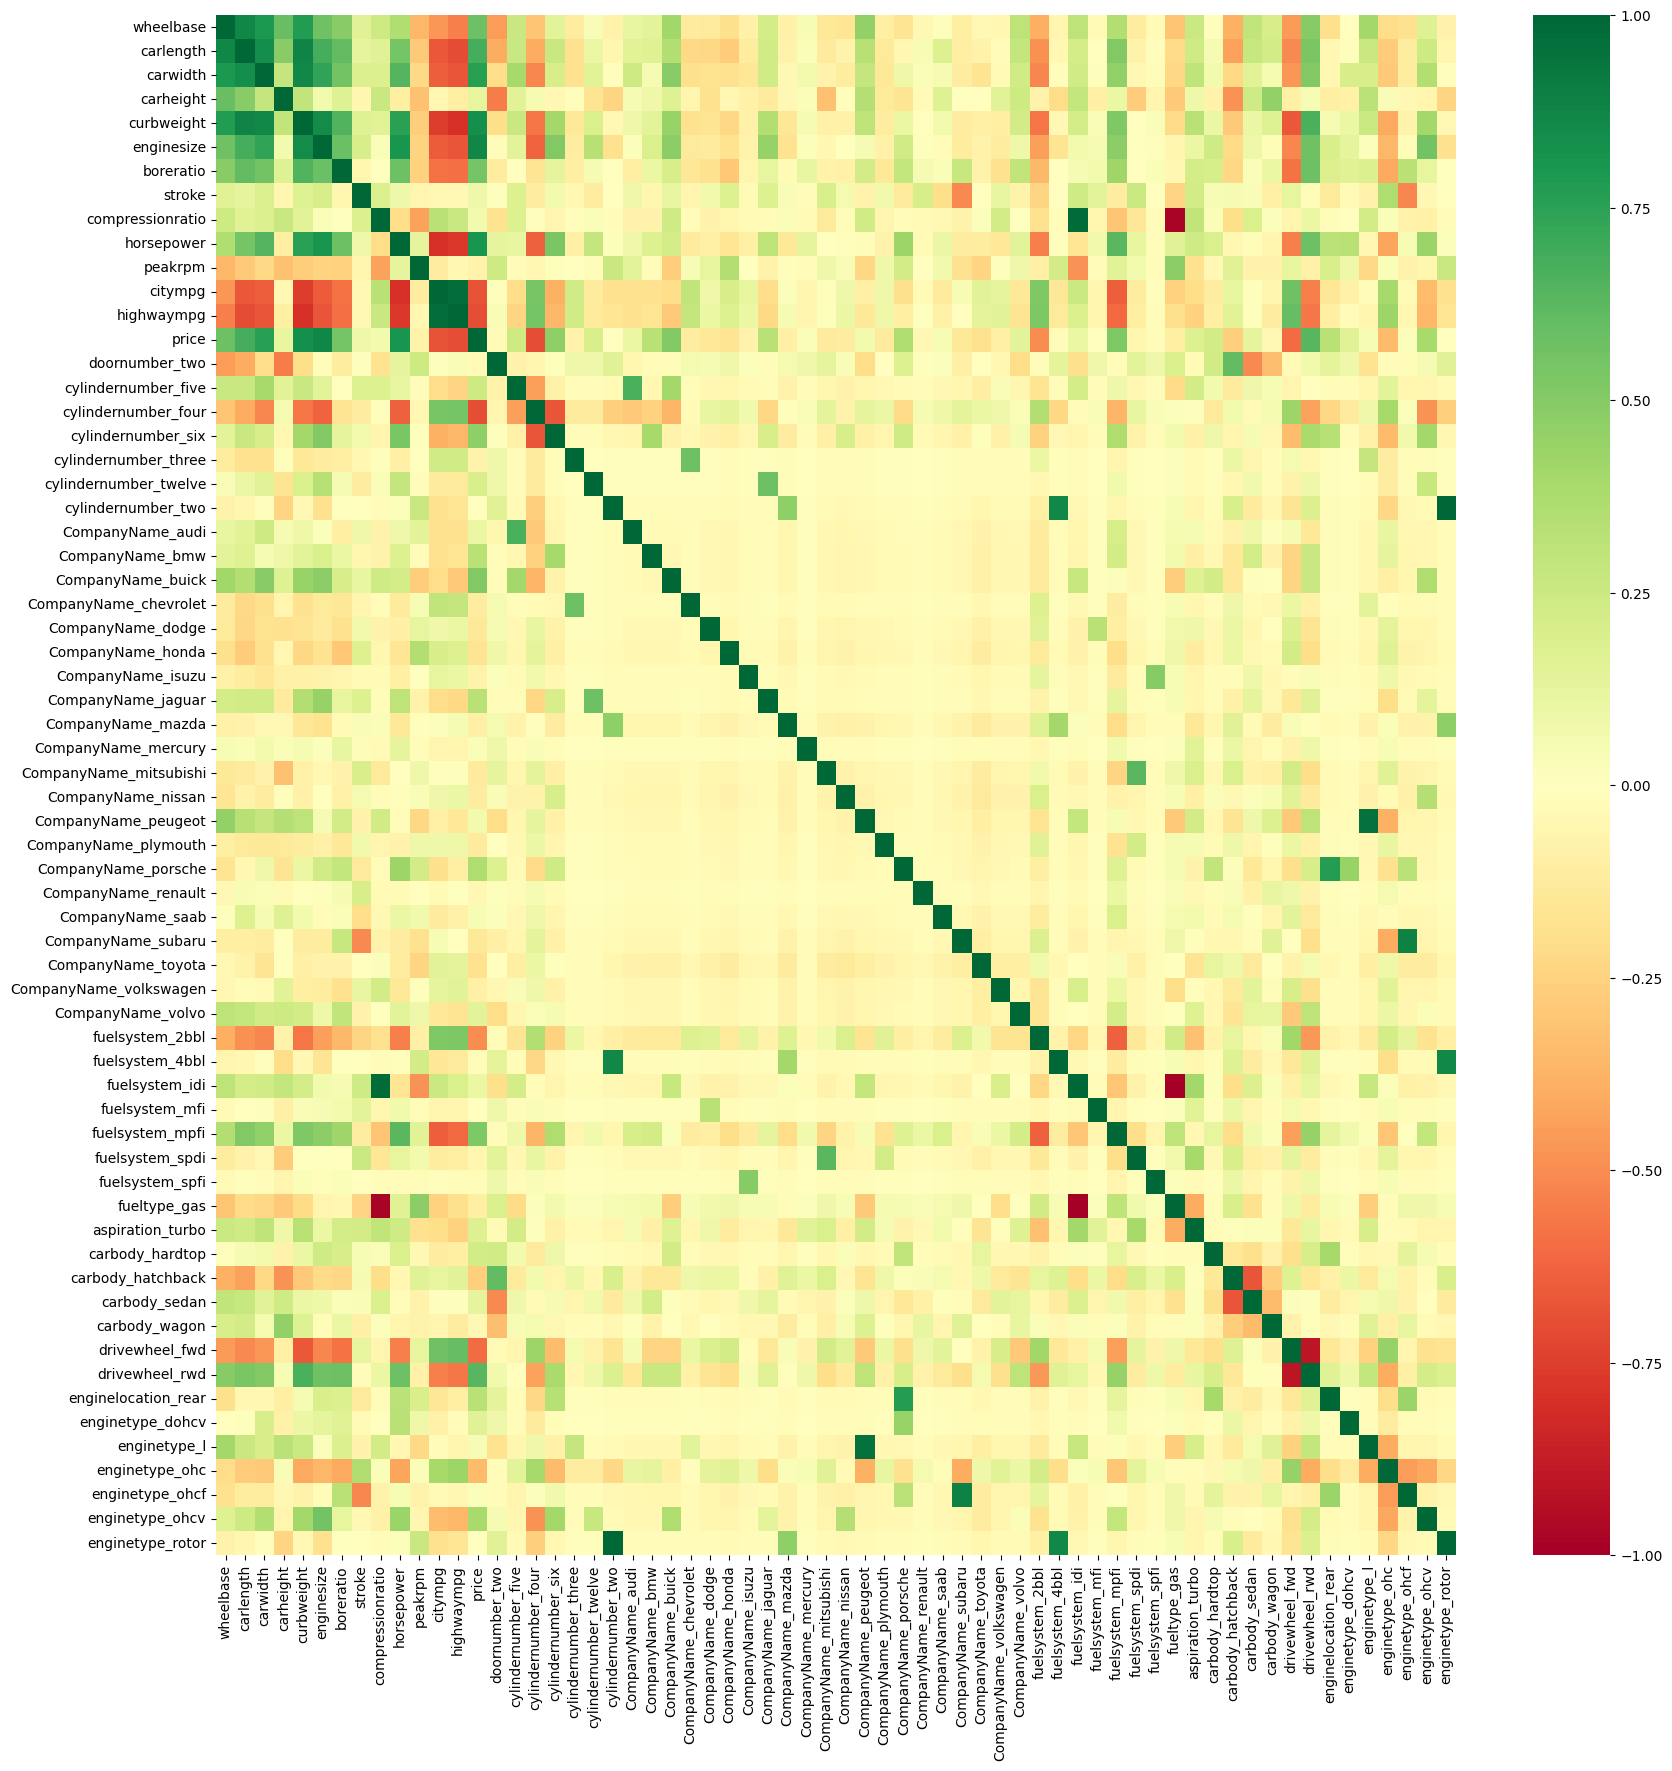

In [23]:
correlation_matrix = df2.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='RdYlGn')
plt.show()

In [26]:
corr_price = df2.corr()['price'].sort_values(ascending=False)
corr_price

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
...,...
fuelsystem_2bbl,-0.501374
drivewheel_fwd,-0.601950
citympg,-0.685751
highwaympg,-0.697599


In [29]:
num = df.select_dtypes(exclude=['object']).columns
num

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

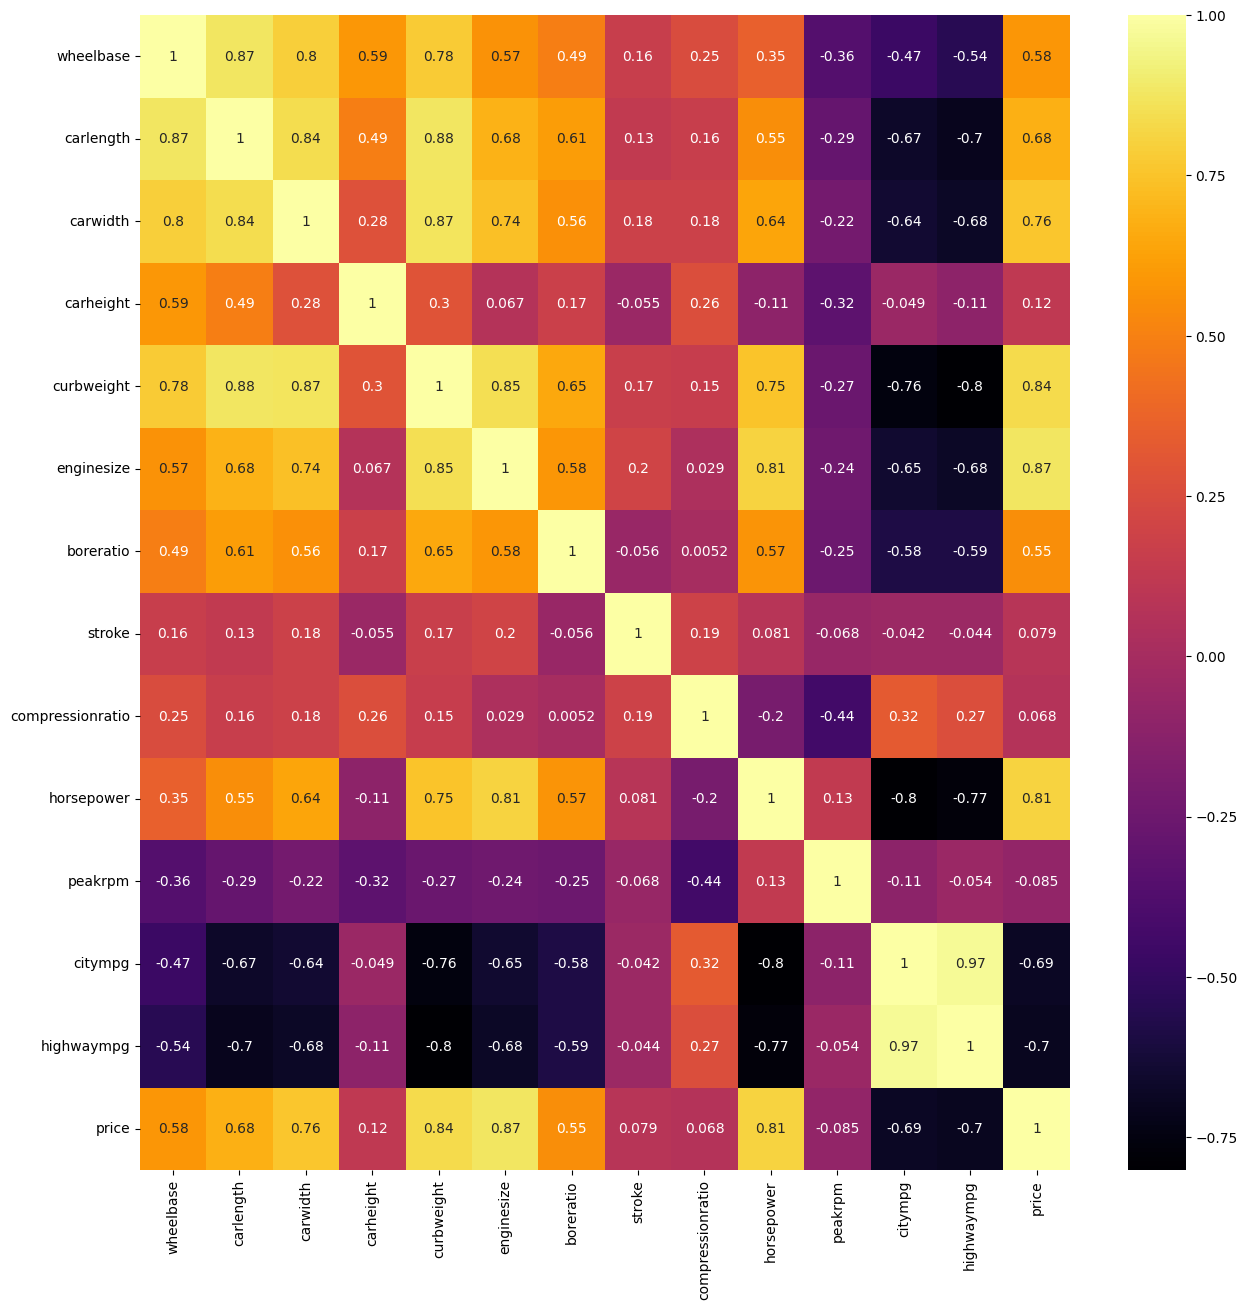

In [31]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[num].corr(), annot=True, cmap='inferno')
plt.show()

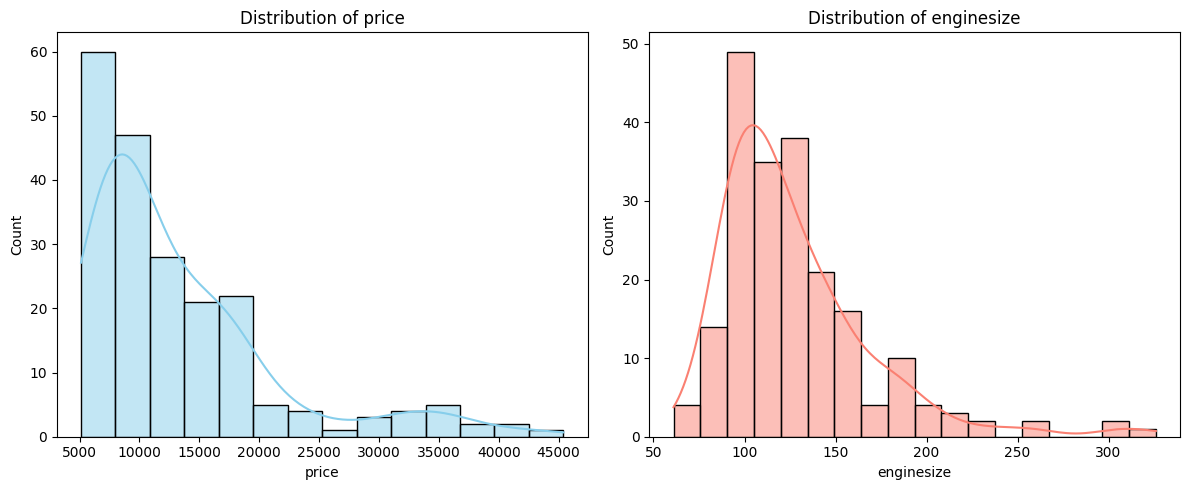

In [33]:
# Define the two features you want to visualize
feature1 = 'price'
feature2 = 'enginesize'

# Set the figure size
plt.figure(figsize=(12, 5))

# Plot the distribution of the first feature
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.histplot(data=df2, x=feature1, kde=True, color='skyblue')
plt.title(f'Distribution of {feature1}')

# Plot the distribution of the second feature
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.histplot(data=df2, x=feature2, kde=True, color='salmon')
plt.title(f'Distribution of {feature2}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

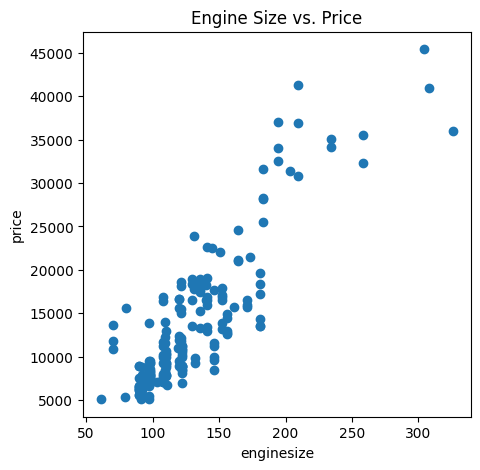

In [34]:
# Create a scatter plot of enginesize against price
plt.figure(figsize=(5, 5))
plt.scatter(x='enginesize', y='price', data=df2)
plt.xlabel('enginesize')
plt.title('Engine Size vs. Price')
plt.ylabel('price')
plt.show()

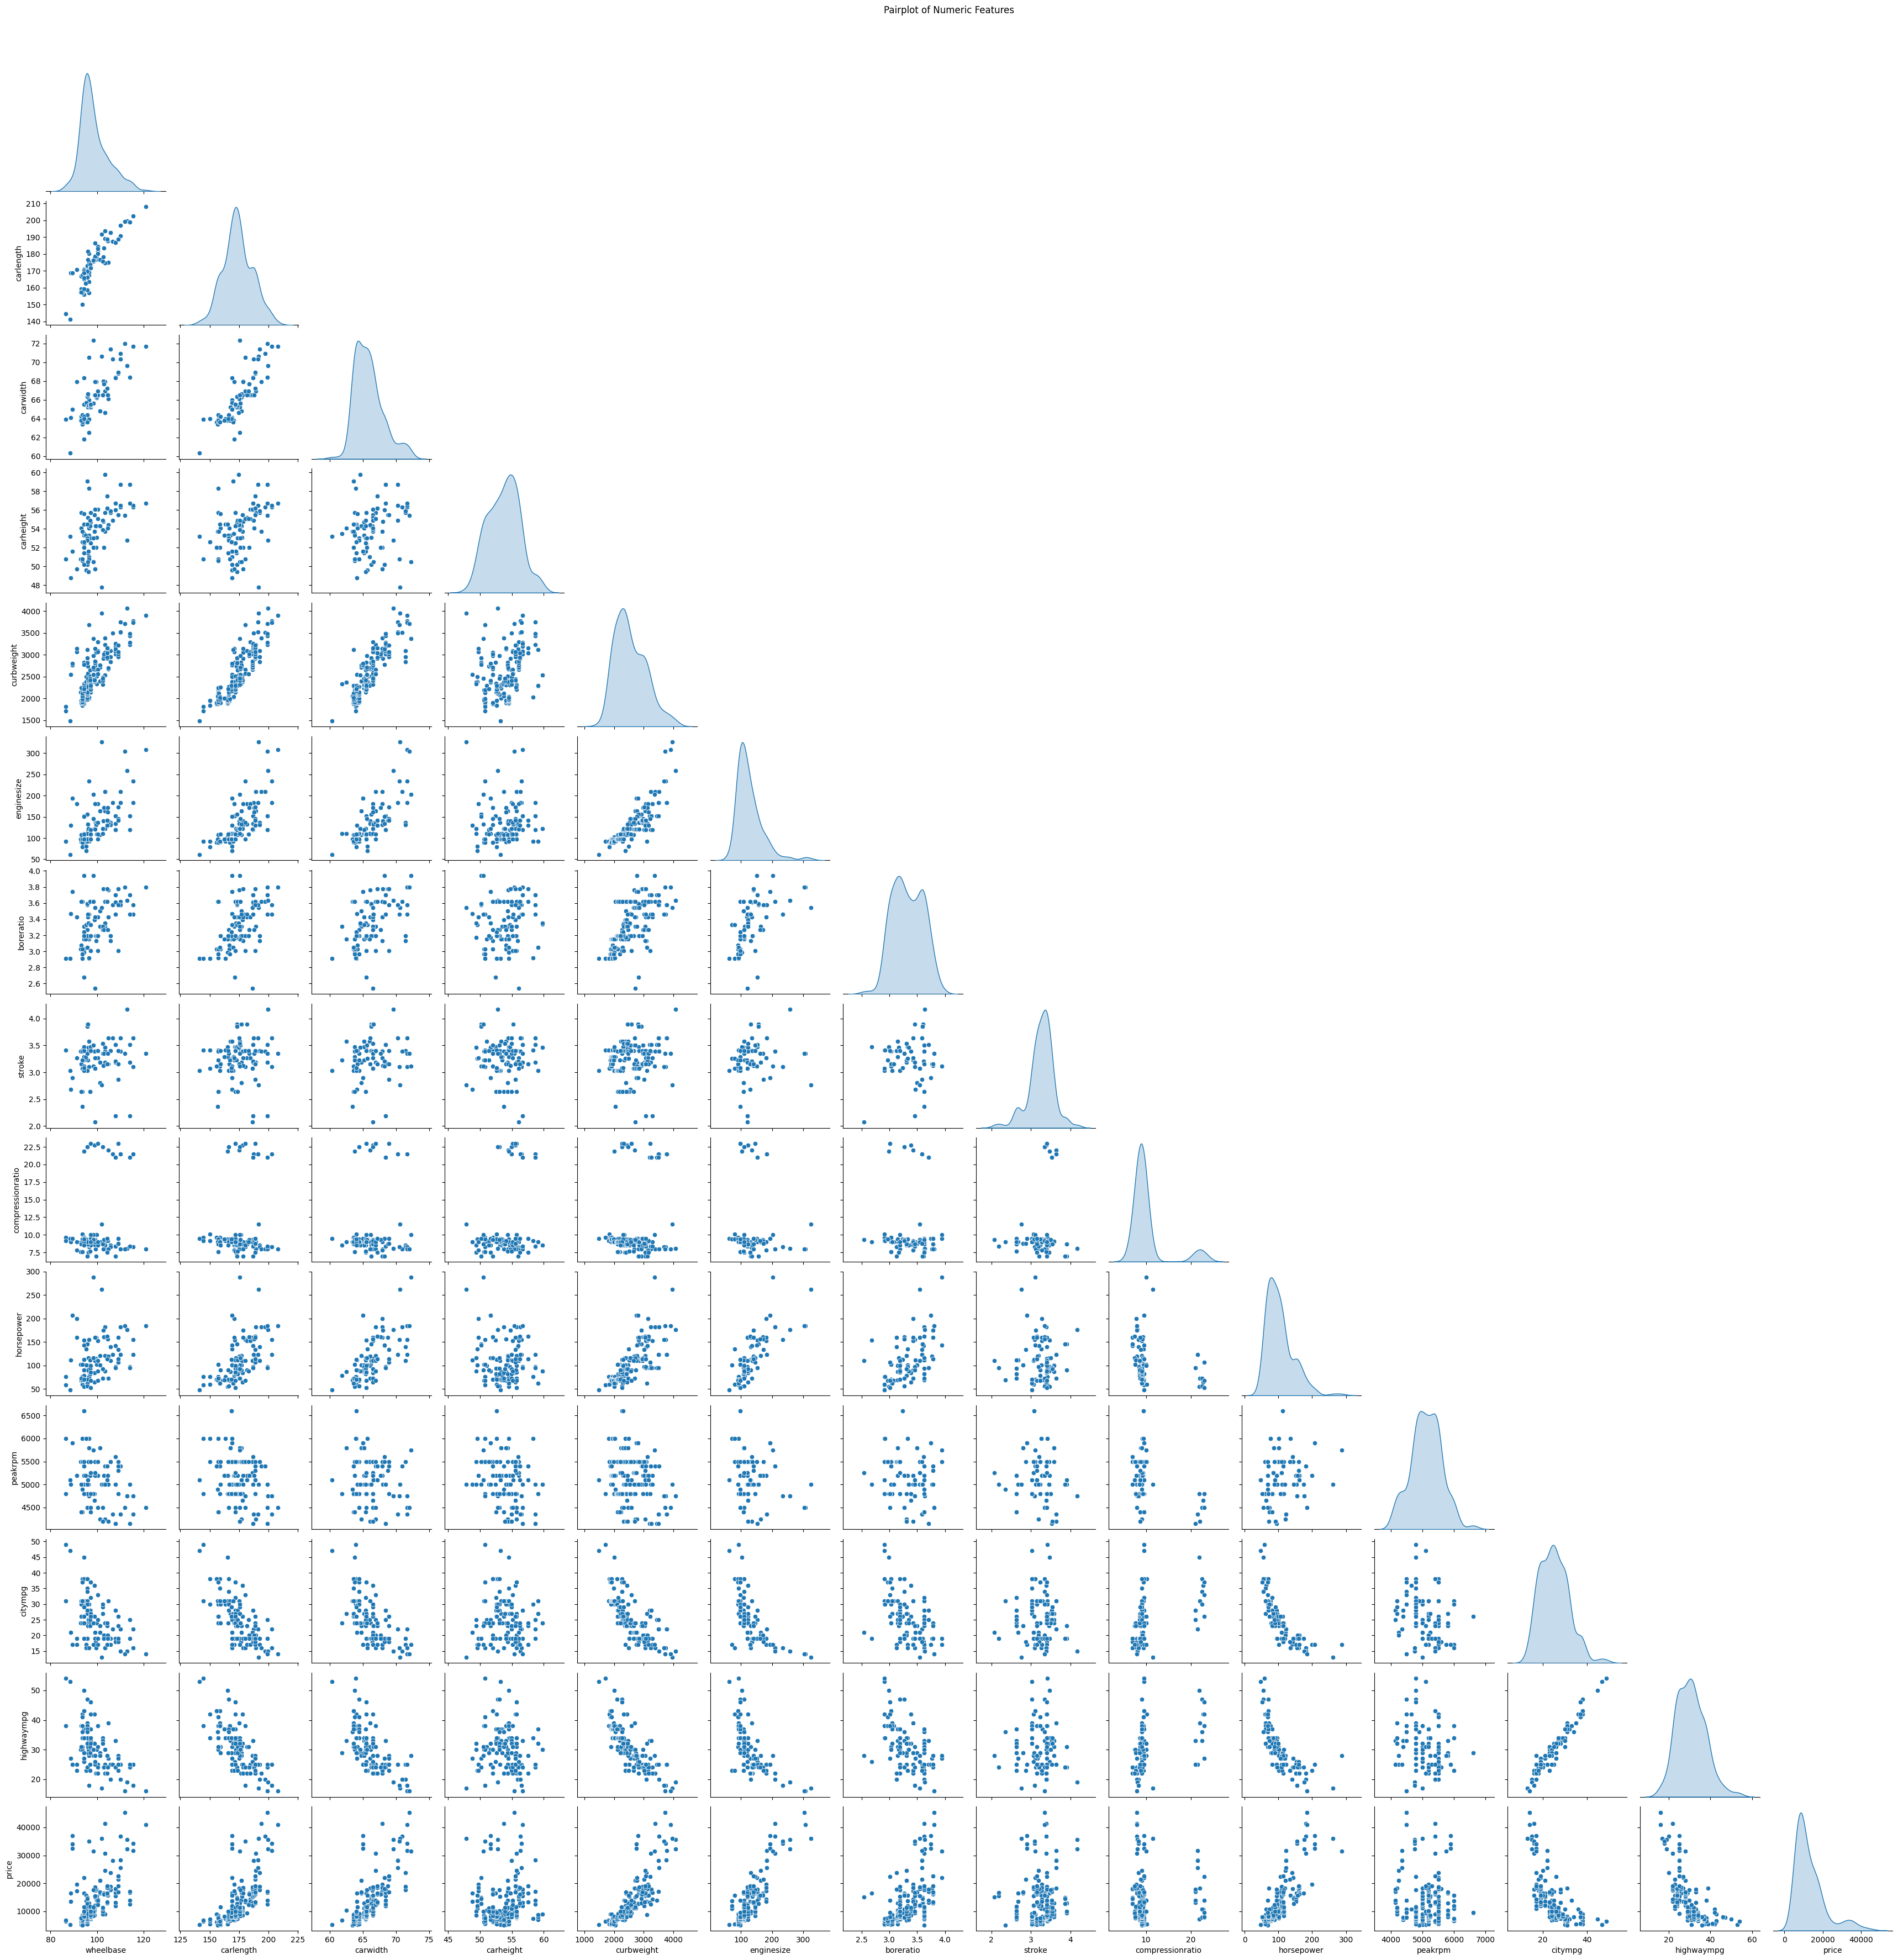

In [35]:
sns.pairplot(df[num], corner=True, diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

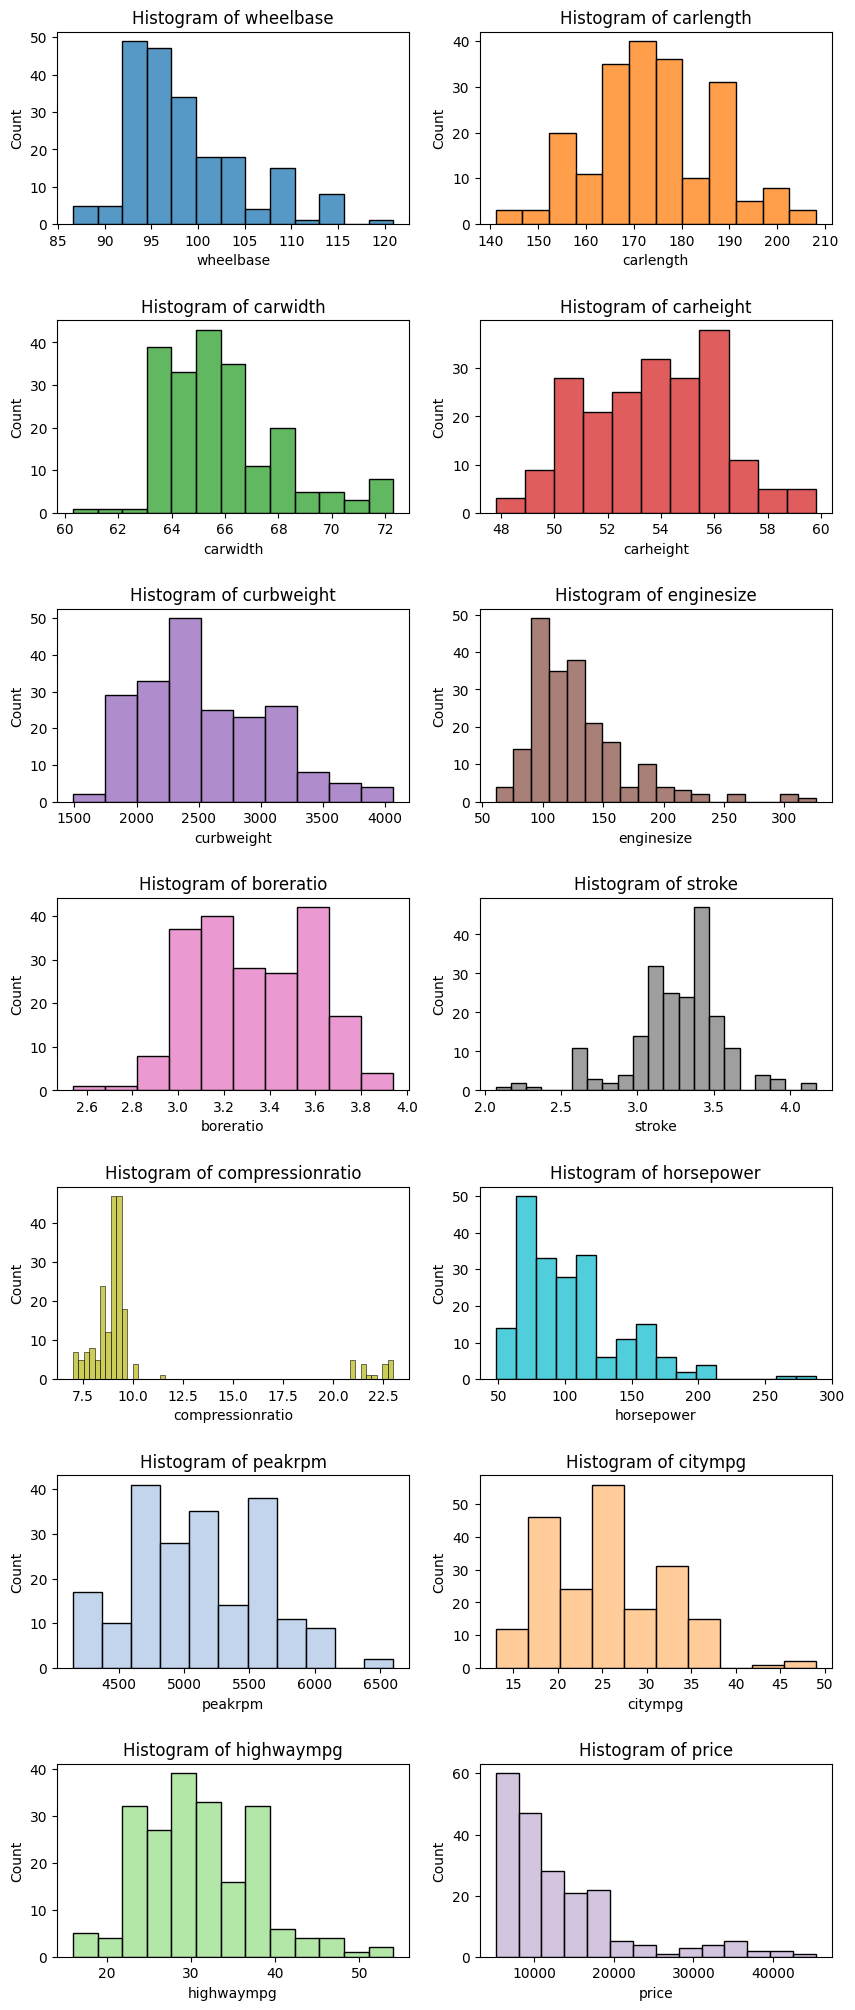

In [46]:
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf',  # Cyan
    '#aec7e8',  # Light Blue
    '#ffbb78',  # Light Orange
    '#98df8a',  # Light Green
    '#c5b0d5'   # Light Purple
]

plt.figure(figsize=(10, 25))
for i, num_column in enumerate(num):
    plt.subplot(7, 2, i+1)
    sns.histplot(data=df, x=num_column, color=colors[i])
    plt.title(f'Histogram of {num_column}')

plt.subplots_adjust(hspace=0.5)
plt.tight_layout
plt.show()

# Split and Normalize Data

In [58]:
df2.select_dtypes(include='object').columns


Index([], dtype='object')

In [59]:
# # Initialize LabelEncoder
# l1 = LabelEncoder()

# # Convert object-type columns to numerical using Label Encoding
# for i in df2.columns:
#     if df2[i].dtype == 'object':
#         df2[i] = l1.fit_transform(df2[i])

In [65]:
X = df2.drop(['price'], axis=1)
y = df2['price']

In [68]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Print the shapes of the datasets
print("X Train Scaler : ", X_train.shape) # Print shape of x_train
print("X Test Scaler : ",  X_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test

X Train Scaler :  (174, 63)
X Test Scaler :  (31, 63)
Y Train Scaler :  (174,)
Y Test Scaler :  (31,)
